# PROSPER LOAN PEER TO PEER ASSIGNMENT

**Manuel del Pino Guerrero y Santiago García Gisbert**

First, we will begin by importing the following libraries:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

The following documentation covers some important aspects of pandas and its applications:

http://pandas.pydata.org/pandas-docs/stable/

https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

## Introduction: Dataset and Data Dictionary

In this notebook, we will work with the Prosper Loan dataset available in the following link: https://raw.githubusercontent.com/joashxu/prosper-loan-data/master/dataset/prosperLoanData.csv

This dataset contains the loan listings on Prosper.com from the end of 2005 until the year 2014. The dataset comes with the variables that provide information on those loans. 

The Prosper Loan Data Dictionary can be found on: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

**Here are the most important variables that we will focus on the most:**

- **LoanStatus**: The current status of the loan. Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

    
- **LoanMonthsSinceOrigination**: Number of months since the loan originated.


- **LoanFirstDefaultedCycleNumber**: The cycle the loan was charged off. If the loan has not charged off the value will be null. *A charge-off or chargeoff is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt.*


- **LoanCurrentDaysDelinquent**: The number of days delinquent. 


These are some other variables:

- **Term**: The length of the loan expressed in months.


- **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. 


- **BorrowerAPR**: The Borrower’s Annual Percentage Rate (APR) for the loan.


- **BorrowerRate**: The Borrower’s interest rate for this loan.


- **ListingCategory**: The category of the listing that the borrower selected when posting their listing. 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.


- **EmploymentStatus**: The length in months of the employment status at the time the listing was created.


- **Occupation**: The Occupation selected by the Borrower at the time they created the listing.


- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.


- **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner (True or False).


- **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.


- **IncomeVerifiable**: The borrower indicated they have the required documentation to support their income (True or False).


- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.


- **MonthlyLoanPayment**: The scheduled monthly loan payment amount.


- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).


- **LoanOriginalAmount**: The original amount of the loan.


- **LoanOriginationDate**: The date the loan was originated.


- **LoanOriginationQuarter**: The quarter in which the loan was originated.

## Step 1: Data Preparation

In this step, we read the csv file that contains Prosper's loan data. The read_csv function returns a pandas dataframe.

In [2]:
df = pd.read_csv('./data/prosperLoanData.csv')

We check the number of rows and columns of our dataset:

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 113937 rows and 81 columns


We check the column names:

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Step 2: Performance & Sample Window

Regarding our analysis is going to be based on the percentage of 'bads', it is important to analyse the features which better express the current state of the loan, therefore it will depend on how we define our **Performance and Sample Window**.

From this, we are going to be able to score predictions in the future with Machine Learning techniques which will be developed in **práctica 3**, with further details.

We begin with the visualization of the variable **LoanOriginationDate**: by plotting a histogram with the amount of loans that originated each year.

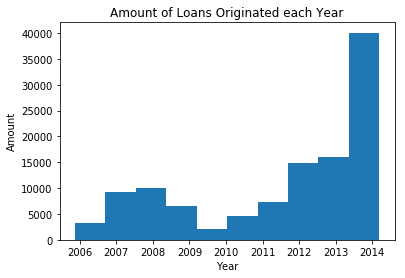

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
x = pd.to_datetime(df.LoanOriginationDate.str[:10])
plt.hist(x)
plt.title('Amount of Loans Originated each Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

Observations: Lowest amount of loans during the years 2009-2010 (after 2007/08 financial crisis). Highest amount of loans during 2012-2014, peak year 2014.


### (1) TO DO . Which of these variables would we choose as the target: LoanStatus or  LoanFirstDefaultedCycleNumber?

**Answer**: We are going to choose option B. Our feature target will be then **LoanFirstDefaultedCycleNumber**, because we are interested about analysing the "maturity", so the most important things are the historic information and therefore, how the loan has developed since their origination date of the loan.

**LoanStatus** does only talk about the LAST STATUS of the loan. We cannot base on this column then to set up the TARGET

## Step 3: Vintage Analysis

*Vintage Analysis – Analyse portfolio performance on a vintage basis.*

In this step we will modify some existing variables, for instance:
- To capture the years since the loan was originated
- To capture the quarter when the first default took place
- Get volume of loans for each amount of years since origination
- Get number of loans that are "bad" for each LoanMonthsSinceOrigination and LoanFirstDefaultedCycleNumber
- Get ratio of bad loans

In [7]:
df.LoanFirstDefaultedCycleNumber.head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: LoanFirstDefaultedCycleNumber, dtype: float64

The idea is to get a precentage of 'BADS LOANS' with the **BAD RATE** expression:

- 1º: Feature **LoanMonthsSinceOrigination** is defined by number of months or years since the Loan origination.
- 2º: We create the feature **LoanFirstDefaultedCycleNumberQ** in order to check the first quarter where the loan became defaulted of payment.
- 3º: Our **df_vintage** will take the years since origination date plus the number of loans originated every single year so that we can have a clear comparison of them.
- 4º step: We define our **BAD RATE**, which will be; number of bad loans / Total of loans

In [8]:
df['LoanMonthsSinceOriginationY'] = (df.LoanMonthsSinceOrigination / 12).round()
df['LoanFirstDefaultedCycleNumberQ'] = 4 * (df.LoanFirstDefaultedCycleNumber / 4).round()
df_vintage = df.groupby('LoanMonthsSinceOriginationY').agg({'LoanMonthsSinceOriginationY': 'size'})\
                                                     .rename(columns={'LoanMonthsSinceOriginationY': 'N_loans'})\
                                                     .reset_index()

df['bad_aux'] = ~df['LoanFirstDefaultedCycleNumber'].isna()
df_def_per_cycle = pd.DataFrame(df.groupby(['LoanMonthsSinceOriginationY', 'LoanFirstDefaultedCycleNumberQ'])['bad_aux'].\
                                sum().groupby(level=[0]).cumsum()).reset_index()

df_def_per_cycle.columns = df_def_per_cycle.columns[:-1].tolist() +  ['N_bads']

df_vintage = df_vintage.merge(df_def_per_cycle, on='LoanMonthsSinceOriginationY')
df_vintage['BR'] = 100. * df_vintage['N_bads'] / df_vintage['N_loans']

df_vintage.head(10)

,LoanMonthsSinceOriginationY,N_loans,LoanFirstDefaultedCycleNumberQ,N_bads,BR
0,0.0,29808,4.0,1.0,0.003355
1,0.0,29808,8.0,3.0,0.010064
2,1.0,21134,0.0,3.0,0.014195
3,1.0,21134,4.0,18.0,0.085171
4,1.0,21134,8.0,462.0,2.186051
5,1.0,21134,12.0,622.0,2.943125
6,1.0,21134,16.0,712.0,3.368979
7,2.0,20122,0.0,8.0,0.039757
8,2.0,20122,4.0,93.0,0.462181
9,2.0,20122,8.0,1075.0,5.342411


We are going to create a **PIVOT TABLE** in order to see the relationship between the first quarter of default payments and the years where the loan is alive itself since the origination date.

In [9]:
df_vin_pvt = df_vintage.pivot(index='LoanMonthsSinceOriginationY', columns='LoanFirstDefaultedCycleNumberQ', values='BR')
df_vin_pvt

LoanFirstDefaultedCycleNumberQ,0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,44.0
LoanMonthsSinceOriginationY,,,,,,,,,,,,
0.0,NaN,0.003355,0.010064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.014195,0.085171,2.186051,2.943125,3.368979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.039757,0.462181,5.342411,8.180101,12.160819,13.850512,15.132691,15.321539,15.326508,NaN,NaN,NaN
3.0,0.497830,0.931836,5.731427,8.424815,12.215982,14.003064,16.504978,17.870820,19.019658,19.211131,19.223896,NaN
4.0,1.117222,1.460983,4.417326,6.170505,8.765899,10.072190,12.220694,13.234789,14.575455,15.177037,15.830182,NaN
5.0,0.861009,NaN,6.150062,9.963100,14.022140,15.252153,17.958180,19.311193,20.541205,21.156212,22.017220,NaN
6.0,1.280445,1.851079,8.427279,12.985386,20.215727,23.291580,27.446068,29.485038,31.649269,32.713987,34.036186,34.043145
7.0,1.988015,2.872634,13.297822,18.814801,25.292495,28.659755,33.368211,35.708171,38.761533,40.017122,41.396366,NaN
8.0,1.276596,2.723404,11.177305,15.829787,22.978723,25.929078,29.900709,31.659574,34.269504,35.659574,36.964539,NaN


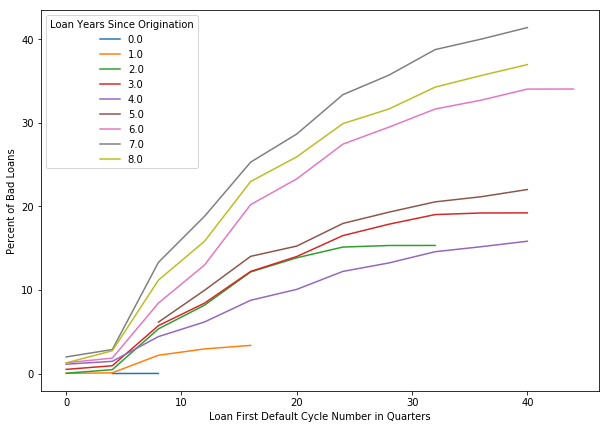

In [10]:
from pylab import rcParams
x = df_vin_pvt.transpose()
rcParams['figure.figsize'] = 10, 7
plt.plot(x)
leg = plt.legend(x, loc='upper left', frameon= True, title = "Loan Years Since Origination")
plt.xlabel("Loan First Default Cycle Number in Quarters")
plt.ylabel("Percent of Bad Loans")
# Place a legend to the right of this smaller subplot.
plt.show()

Observations: if we look at the graph above, we can see that the percentage of bad loans is much higher when they have been originated since 6+ years. If we look at those loans originated since 0-5 years, they are not so bad.

## Step 4: Good, bad, indeterminate definition

### **(2) TO DO**. Create "fraud", "bad", and "indeterm" columns. Given a dataframe, use  Performance Window and  Fraud Threshold (number of months) as inputs (fix the fraud threshold at 4 months). Return a dataframe with the new columns as an output.

In [11]:
def generate_pop_flags(df, PW_size, TH_fraud=4):
    """Generates fraud, bad, and indeterminate columns
    Vamos a realizar una pequeña modificación en la anterior función
    con objetivo de que se devuelva una variable nueva
    
    Args:
        df: Pandas DataFrame with the input data
        PW_size: Int Performance window size (months)
        TH_fraud: Int number of months used as treshold for fraud
        
    Returns:
        Pandas DataFrame with the columns that capture
        fraud, bad and indeterminate
    """
    res = pd.DataFrame()
    #PW maturity
    res['PW'] = df.LoanMonthsSinceOrigination >= PW_size
    #handle fraud 
    res['fraud'] = df.LoanFirstDefaultedCycleNumber <= TH_fraud
    #bad definition
    res['bad'] = (df.LoanFirstDefaultedCycleNumber > TH_fraud) & (df.LoanFirstDefaultedCycleNumber <= PW_size)
    #indeterminates
    res['indeterm'] = (df.LoanFirstDefaultedCycleNumber > PW_size)
    res.loc[(res.bad == 0) & (df.LoanCurrentDaysDelinquent > 30), 'indeterm'] = True
    return df.join(res)

With that modification, we are going to be able to try easily different paramethers for the PW and the fraud Threshold (TH_fraud)

In [12]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,6.0,NaN,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,0.0,NaN,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,7.0,NaN,False
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,1.0,NaN,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,0.0,NaN,False


### (3) TO DO. Use different PW sizes, and get the counts and rates for the main population flags (Has PW, Fraud, Bad, Indeterm). Explain which PW size should be used, and pick that one as the final one.

### If we set PW at 6 months:

In [13]:
first = generate_pop_flags(df, 6) # PW_size = 6
first[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          87315
fraud         562
bad          1096
indeterm    16955
dtype: int64

In [14]:
second = generate_pop_flags(df, 8, 6) #Pw_size = 8, TH_Fraud = 6
second[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          81069
fraud        1658
bad          1834
indeterm    16215
dtype: int64

### If we set PW at 12 months:

In [16]:
doce = generate_pop_flags(df, 12)
doce[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          71036
fraud         562
bad          6397
indeterm    11654
dtype: int64

### If we set PW at 18 months:

In [17]:
eighteen = generate_pop_flags(df, 18)
eighteen[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          62995
fraud         562
bad         10555
indeterm     7496
dtype: int64

### If we set PW at 24 months:

In [19]:
twentyfour = generate_pop_flags(df, 24)
twentyfour[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          52302
fraud         562
bad         13195
indeterm     4856
dtype: int64

In [20]:
print("These are the amount of observations per value, for each variable. \n  \n For PW: \n {}, \n \n For Fraud: \n {}, \n \n For Bad Loans: \n {}, \n \n For Indeterm Loans: \n {}".\
      format(df.PW.value_counts(), df.fraud.value_counts(), df.bad.value_counts(), df.indeterm.value_counts()))

These are the amount of observations per value, for each variable. 
  
 For PW: 
 False    61635
True     52302
Name: PW, dtype: int64, 
 
 For Fraud: 
 False    113375
True        562
Name: fraud, dtype: int64, 
 
 For Bad Loans: 
 False    100742
True      13195
Name: bad, dtype: int64, 
 
 For Indeterm Loans: 
 False    109081
True       4856
Name: indeterm, dtype: int64


### If we set PW at 36 months:

In [20]:
thirtysix = generate_pop_flags(df, 36)
thirtysix[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          38383
fraud         562
bad         15850
indeterm     2201
dtype: int64

In [23]:
print("These are the amount of observations per value, for each variable. \n  \n For PW: \n {}, \n \n For Fraud: \n {}, \n \n For Bad Loans: \n {}, \n \n For Indeterm Loans: \n {}".\
      format(df.PW.value_counts(), df.fraud.value_counts(), df.bad.value_counts(), df.indeterm.value_counts()))

These are the amount of observations per value, for each variable. 
  
 For PW: 
 False    75554
True     38383
Name: PW, dtype: int64, 
 
 For Fraud: 
 False    113375
True        562
Name: fraud, dtype: int64, 
 
 For Bad Loans: 
 False    98087
True     15850
Name: bad, dtype: int64, 
 
 For Indeterm Loans: 
 False    111736
True       2201
Name: indeterm, dtype: int64


### (4) TO DO. Choose PW size.

**Answer**: We set the performance window at **18 months**. The reason we chose this number and not 24 months, for instance, is because a performance window should have a wide timeframe to hold enough events (pw, fraud, bad, indeterm rates show this). With 18 months we have 45% of the population inside that timeframe, and we also have a good balance of different events. If we look at PW = 36 months, the data available decreases, since we have 33% of the population inside the performance window, compared to a 45% with PW = 18. We also see the rates of bad loans are so much higher, but the rest of the events are less balanced (very low rates for fraud and indeterm). This makes sense because we have less observations inside the performance window (many loans have already matured). 

As a conclusion, 18 months seems to be a good number to capture the amount of bad, fraudulent or indeterm loans. 24 months could also be a good option, but we chose 18 months to have a reasonable timeframe of analysis. Also, credit risk modeling practices suggest the window of performance is usually between 12-24 months.

In [21]:
eighteen = generate_pop_flags(df, 18)
eighteen[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          62995
fraud         562
bad         10555
indeterm     7496
dtype: int64

In [22]:
generate_pop_flags(df, 18).head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,PW,fraud,bad,indeterm
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,0,0.0,258,6.0,NaN,False,True,False,False,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0,0.0,1,0.0,NaN,False,False,False,False,False


In [23]:
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,0.0,0.0,1.0,0,0,0.0,258,6.0,NaN,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.0,0.0,1.0,0,0,0.0,1,0.0,NaN,False


In [24]:
PW_size = 18
TH_fraud= 4

In [25]:
df['PW']= df.LoanMonthsSinceOrigination >= PW_size
df['fraud']= df.LoanFirstDefaultedCycleNumber <= TH_fraud
df['bad']= (df.LoanFirstDefaultedCycleNumber> TH_fraud) & (df.LoanFirstDefaultedCycleNumber <= PW_size)
df['indeterm']= (df.LoanFirstDefaultedCycleNumber> PW_size)
df.loc[(df.bad==0) & (df.LoanCurrentDaysDelinquent> 30), 'indeterm']= True

In [26]:
df[['PW', 'fraud', 'bad', 'indeterm']].sum()

PW          62995
fraud         562
bad         10555
indeterm     7496
dtype: int64

### (5) TO DO. Explain the following behaviour:


- We choose the activated target and extract different values from there

- BAD definition is based on what day it became defaulted. The fact of seeing a zero means that to a current date, the loan has been completed. The fact of seeing 26 zeros means that it might have become defaulted but also that the payment has been completed after that.


In [27]:
display(df.loc[df.bad==True, 'LoanCurrentDaysDelinquent'].value_counts().sort_index()[:20])
df.loc[df.bad==True, 'LoanStatus'].value_counts().sort_index()[:20]

0     26
16     1
17     1
24     1
34     1
58     1
66     1
67     1
69     1
74     1
76     2
87     1
88     1
90     2
92     1
93     5
94     2
95     3
96     1
97     1
Name: LoanCurrentDaysDelinquent, dtype: int64

Chargedoff               7130
Completed                  26
Defaulted                3397
Past Due (16-30 days)       1
Past Due (61-90 days)       1
Name: LoanStatus, dtype: int64

**Answer**: The first line of code displays those loans inside our dataset that have been categorized by us in the previous function as "bad", and have been delinquent for the days shown on the right-side column. 

The maximum number of days delinquent is of 1,658 days when we have a PW of 18 months. We also observe how large the amount of Chargedoff loans is, around 7,130. We can see there are some loans inside the completed/final payment in progress categories, but they are very few. Most loans are either Chargedoff or Defaulted. This means **we have categorized some loans as "bad" when they have been completed (paid) or are almost paid, so our function miscategorizes some loans as "bad" when, in fact, they are not.**

## Step 5: First exclusion set

### (6) TO DO. Filter the data as expected. Keep only the data with enough maturity in the performance window. Drop Fraud. Indeterminates will be handled after.

## First exclusion set

Once the PW is defindes, we should keep enough maturity in our data. To achieve this we are going to filter all loans which Origination Date are bigger than 18 months. Besides, those who have been determined as **fraud** will be skipped.

**Note**: Bigger than 1 year and a half is due to our **PW == 18 Months**

In [28]:
def filter_exclusions(df):
    """Function that handles the population definition
    
    Args:
        df: Pandas DataFrame with the in time input data
        
    Returns:
        Pandas DataFrame with the population definition applied
    """
    filtro1 = df.LoanMonthsSinceOrigination >= PW_size
    filtro2 = df.fraud == False

    res = df[(filtro1 & filtro2)]
    return(res)

In [29]:
df = filter_exclusions(df)
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 62437 rows and 88 columns


When filtering the data based on the performance window and eliminating fraud cases, we obtained that the number of rows went from 113.937 to 62.437;  which represented a decrease of 43.59% of the total sample.

## Step 6: Bad rate

In [30]:
df.bad.value_counts()

False    52593
True      9844
Name: bad, dtype: int64

In [31]:
100. * df.bad.value_counts() / df.shape[0]

False    84.233708
True     15.766292
Name: bad, dtype: float64

In [32]:
df[['ListingCreationDate', 'LoanOriginationDate']].head()

,ListingCreationDate,LoanOriginationDate
0,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00
2,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00
10,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00
11,2007-10-09 20:28:33.640000000,2007-10-18 00:00:00
15,2012-04-10 09:14:46.297000000,2012-04-19 00:00:00


In [33]:
df['LoanOriginationDate'] = pd.to_datetime(df.LoanOriginationDate.str[:10])
df['LoanOriginationYear'] = pd.to_datetime(df.LoanOriginationDate.values).year

C:\Users\Knowhow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Knowhow\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
df[['LoanOriginationDate','LoanOriginationYear' ]].head(2)

,LoanOriginationDate,LoanOriginationYear
0,2007-09-12,2007
2,2007-01-17,2007


## Step 7: Additional exclusions

### (7) TO DO. Review Temporal BR. Propose and Implement Adapted Sampling Window.

In [35]:
def describe_yearly_BR(df, col_year = 'LoanOriginationYear', col_target = 'bad'):
    """Describes the yearly number of loans, bad loans and bad rate of the portfolio
    
    Args:
        df: Pandas DataFrame with the input data
        col_year: Name of the column that captures the loan origination date
        col_target: Name of the target column
        
    Returns:
        Pandas DataFrame with the yearly number of loans, bad 
        loans and bad rate of the portfolio 
    """
    # Selecting dataframe by columns names
    df_BR = df[[col_year, col_target]]
    # Create new column
    df_BR.insert(1, 'N_loans', 1)
    # Aggregate by loan year
    df_BR_year = df_BR.groupby('LoanOriginationYear').sum()
    # Generate the bad rate (BR) expressed in percent
    df_BR_year['BR%'] = 100 * (df_BR_year.bad / df_BR_year.N_loans).round(4)
    
    return df_BR_year

In [36]:
describe_yearly_BR(df)

,N_loans,bad,BR%
LoanOriginationYear,,,
2005,22,0.0,0.00
2006,5822,1415.0,24.30
2007,11240,2429.0,21.61
2008,11411,2183.0,19.13
2009,2032,156.0,7.68
2010,5579,447.0,8.01
2011,11208,1354.0,12.08
2012,15123,1860.0,12.30


The largest number of loans was concentrated between 2007 and 2008. However, given the closure of activities between November 2008 and July 2009, few loans were presented for this year. In addition, for the year 2011 the number of loans increases at the level of past years.

Based on the results of the previous table, the **sample window** can be considered from the year 2010, in which the company resumes its operations after the closing. To ensure that the sample does not include any data from abnormal periods, so that the sample used is in line with normal business periods.

The theory indicates that with a sample of 2.000 bad loans it's possible to create a scorecard. For data **in time**, with the observations between 2010 and 2011 we obtained at least 2.000 bad loans and we could left 2012 information to use for as data **out of time**.

In [37]:
col_year= df[df['LoanOriginationYear'] >2008]
col_year.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,LoanOriginationYear
count,33942.000000,33942.000000,33942.000000,33942.000000,33942.000000,33798.000000,33798.000000,33798.000000,33798.000000,33798.000000,...,33942.000000,33942.000000,33942.000000,33942.000000,33942.000000,33942.000000,33942.000000,33942.000000,5428.000000,33942.000000
mean,536418.776177,39.228566,0.252656,0.221474,0.211462,0.185579,0.093414,0.111245,3.684390,6.361264,...,773.052476,16.326609,0.996610,0.033557,0.018296,10.550686,90.710300,2.593424,15.384672,2011.161452
std,60327.161680,10.297013,0.089327,0.082858,0.082861,0.081103,0.054445,0.036237,1.825156,2.244230,...,2339.259314,167.047001,0.027658,0.254060,0.163709,185.878424,96.228408,0.793659,7.372587,0.907385
min,149172.000000,12.000000,0.045830,0.040000,0.030000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-504.410000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2009.000000
25%,493374.750000,36.000000,0.177540,0.148600,0.138600,0.123700,0.052000,0.087800,2.000000,5.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,26.000000,2.000000,8.000000,2011.000000
50%,538486.000000,36.000000,0.270600,0.234300,0.224300,0.185500,0.095000,0.118900,3.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,59.000000,2.000000,16.000000,2011.000000
75%,585057.250000,36.000000,0.339730,0.299900,0.289900,0.254800,0.142000,0.139200,5.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,122.000000,3.000000,20.000000,2012.000000
max,646642.000000,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.283700,7.000000,10.000000,...,25000.000000,6296.960000,1.012500,18.000000,9.000000,11000.000000,1189.000000,5.000000,40.000000,2012.000000


## Step 8: Final output sampling:

   

 - **IT (In Time)**:
     - Train
     - Validation 
     - Reject Inference sample
 - **OOT (Out of time)**


In [38]:
describe_yearly_BR(col_year, 'LoanOriginationYear', 'bad')

,N_loans,bad,BR%
LoanOriginationYear,,,
2009,2032,156.0,7.68
2010,5579,447.0,8.01
2011,11208,1354.0,12.08
2012,15123,1860.0,12.30


We obtain the next results:
- Performance Window: equal or higher to 1 year and a half (18 months)


 **Sample Window** for years 2009, 2010, 2011 y 2012.


- In Time will be included in our training dataset, validation and test as well. 


- OOT wil, be for second half of 2012 y 2013

### Final output sampling:

   

 - IT (In Time):
     - Train
     - Validation 
     - Reject Inference sample
 - OOT (Out of time)

### (8) TO DO. Filter data as needed. Split randomly in Train (60%), Validation (20%) and RI (Rejected Inference (20%).

In [39]:
import datetime as dt

filtro1 = df.LoanOriginationYear >= 2009
filtro2 = df.LoanOriginationDate < dt.datetime(2012, 6, 30)
df_it = df[(filtro1 & filtro2)]
# TODO: filter data as needed
# Split randomly in train, validation and RI
# - 60% Train, 20% val, 20% RI
df_train = df_it.sample(frac=0.6, random_state=42)
df_val_ri = df_it.loc[~df_it.index.isin(df_train.index)]
df_val = df_val_ri.sample(frac=0.5, random_state=42)
df_ri = df_val_ri.loc[~df_val_ri.index.isin(df_val.index)]

In [40]:
len(df_it), len(df_train), len(df_val), len(df_ri)

(28311, 16987, 5662, 5662)

In [41]:
print('The number of observations in time are', len(df_it))
print('The number of observations of training sample are', len(df_train))
print('The number of observations of validation sample are', len(df_val))
print('The number of observations of reject inference sample are', len(df_ri))

The number of observations in time are 28311
The number of observations of training sample are 16987
The number of observations of validation sample are 5662
The number of observations of reject inference sample are 5662


### (9) TO DO. Filter data as needed. Write everything into its corresponding csv file.

In [42]:
filt = df.LoanOriginationDate >= dt.datetime(2012, 6, 30)
df_oot = df[filt]

# Write everything
df_train.to_csv('./data/prosperLoanData_train.csv', index=False)
df_val.to_csv('./data/prosperLoanData_val.csv', index=False)
df_ri.to_csv('./data/prosperLoanData_ri.csv', index=False)
df_oot.to_csv('./data/prosperLoanData_oot.csv', index=False)
#ri es reject inference= inferencia de denegados

In [43]:
df_oot.shape

(5631, 89)

### (10) TO DO. What input columns can be used as features? If not used as feature, give a short explanation.

**Answer**: Due to the great amount of features it's very difficult to observe the correlations between the features. Even so, the relations between the rate's variable or amortizations and principal of the loans are noticeable. The excluded features are:

- **ListingKey**: is an ID. Other features as ListingNumber, LoanKey, LoanNumber or Member are excluded for the same reason
- **CreditGrade**: is only applicable to loan pre2009
- **ClosedDate**: is only applicable for some statuses
- **ProsperRating (alpha and numeric)**: it is thought ProsperScore will be a better indicator 
- **LenderYield**: is very similar to others features of rates
- **CreditScoreRange**: is not useful because we use ProsperScore
- **IncomeVerifiable, LoanOriginationQuarter, Recommendations and InvestmentFromFriends**: are not useful
- **ListingCreationDate**: could be reiterative with the performance window
- **LoanStatus and ListingCategory**: too many categories
- There are a lot of variables related to the beginning of the loan. For this reason, the features named in the instructions in the numbers 28-48, 50, 52-59 are excluded.
- There are doubts about the explanation and the convinience of these variables: Occupation, CurrentlyInGroup, GroupKey, DateCreditPulled and PercentFunded


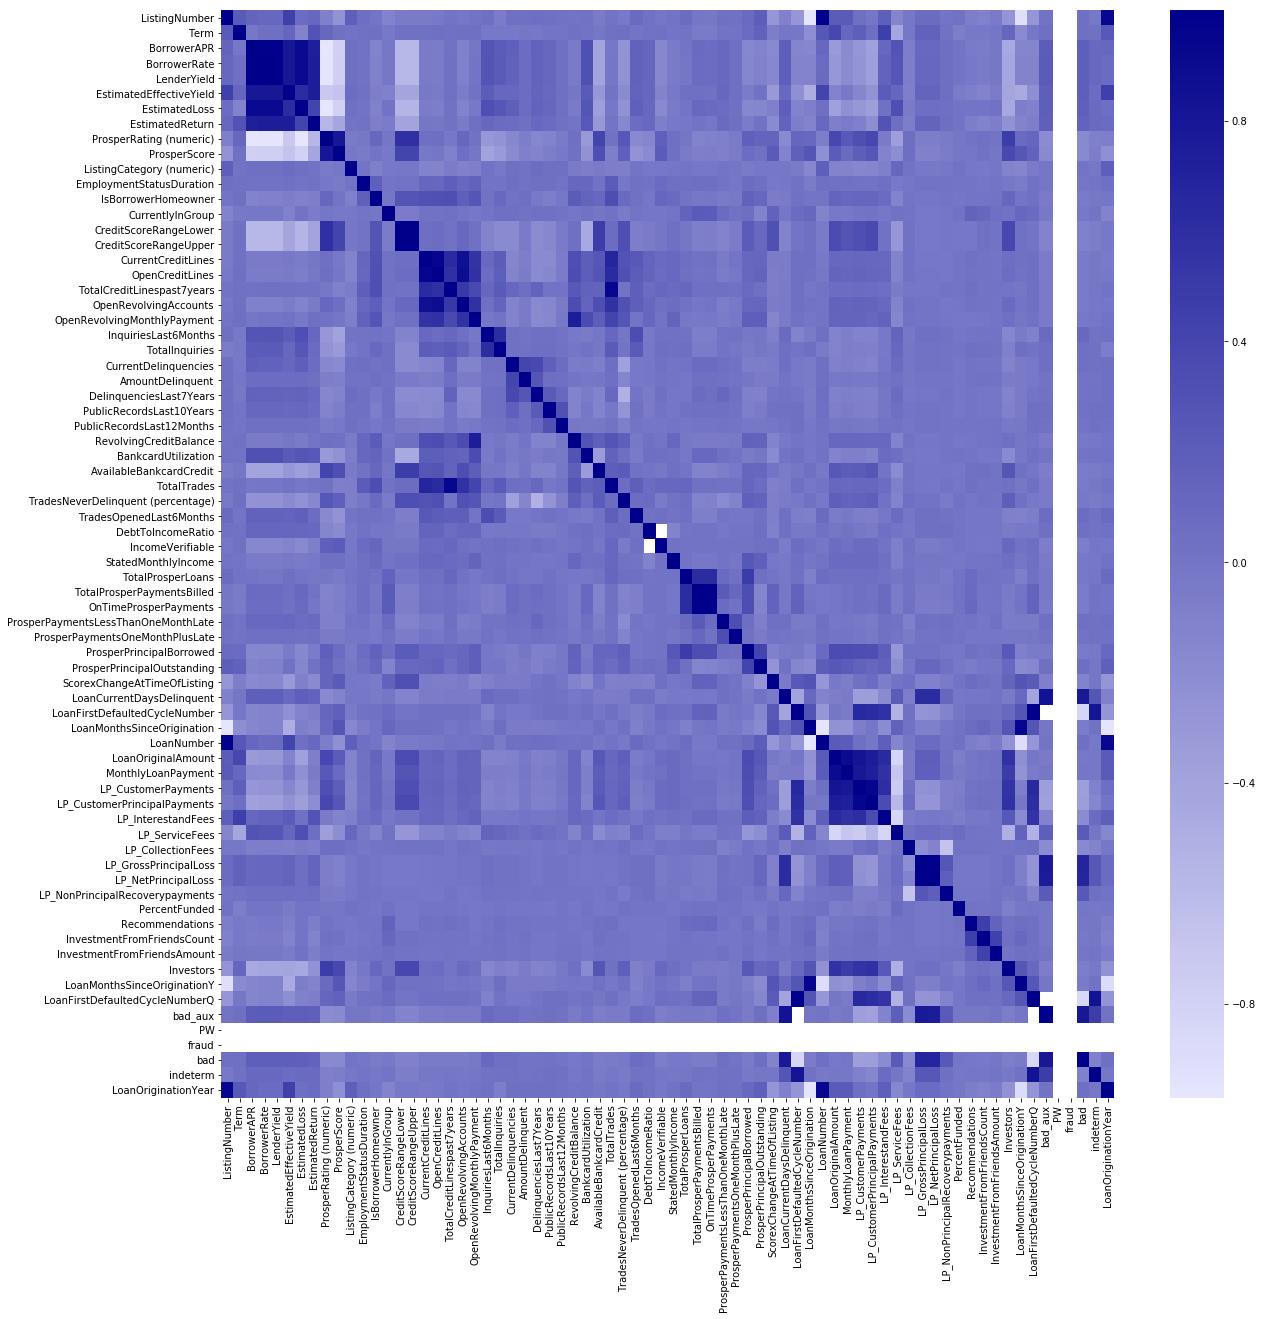

In [44]:
matriz_corr = df_it.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(round(matriz_corr, 2), cmap = sns.light_palette("darkblue", as_cmap=True))